In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    Regression
    
    Polynomial --> When you have to handle data with more than one degree
    
    The data with more bands cannot be handle with linear regression
    
    

In [2]:
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, '2Degree')

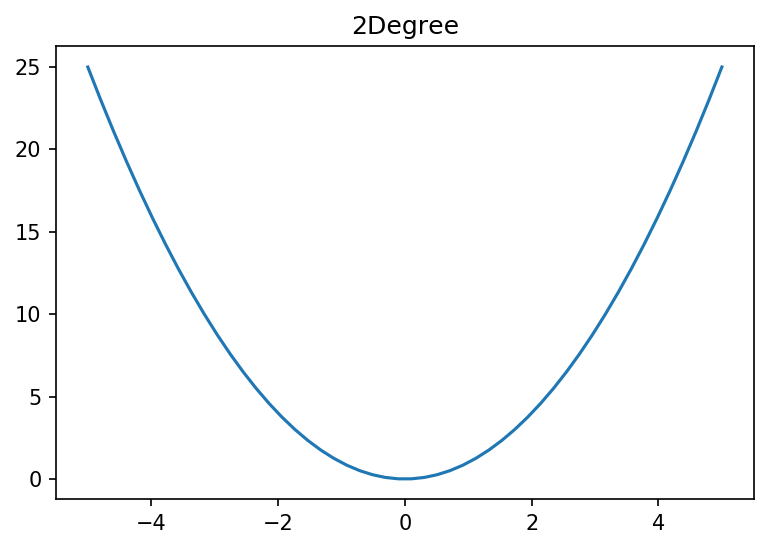

In [11]:
x = np.linspace(-5,5,50)
plt.plot(x,x**2)
plt.title("2Degree")

Text(0.5, 1.0, '3Degree')

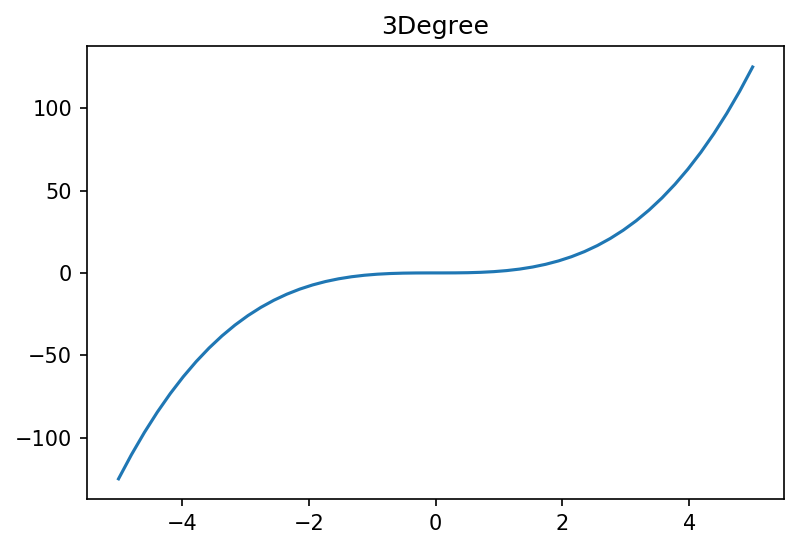

In [13]:
x = np.linspace(-5,5,50)
plt.plot(x,x**3)
plt.title("3Degree")

Text(0.5, 1.0, '4Degree')

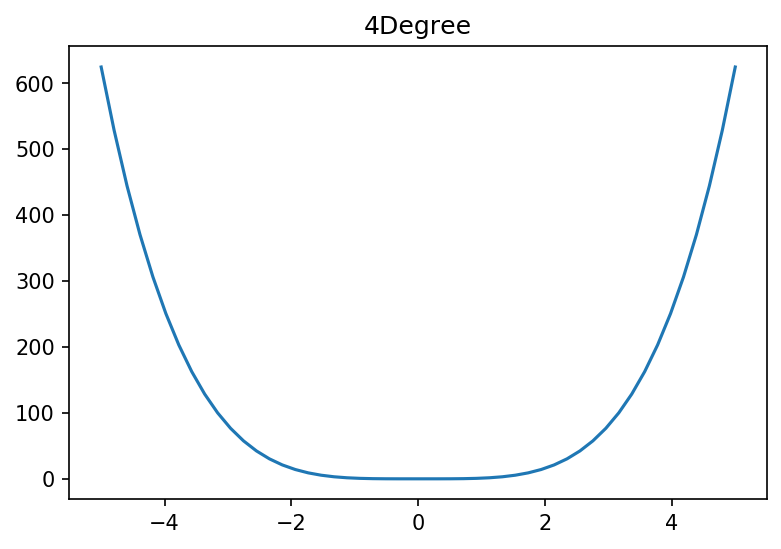

In [15]:
x = np.linspace(-5,5,50)
plt.plot(x,x**4)
plt.title("4Degree")

Text(0.5, 1.0, '1Degree')

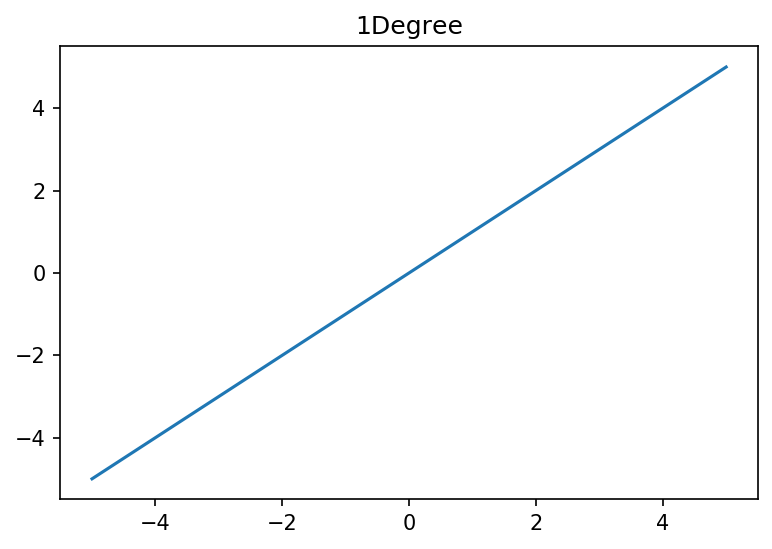

In [16]:
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.title("1Degree")

#### Equations

Linear $$ y = ax + b $$

2 Degree $$ y = ax^2 + bx + c $$

3 Degree $$ y = ax^3 + bx^2 + cx + d $$

In [19]:
x = np.random.normal(50,60,100)
y = x**2  + 0.5 + np.random.randn(100)

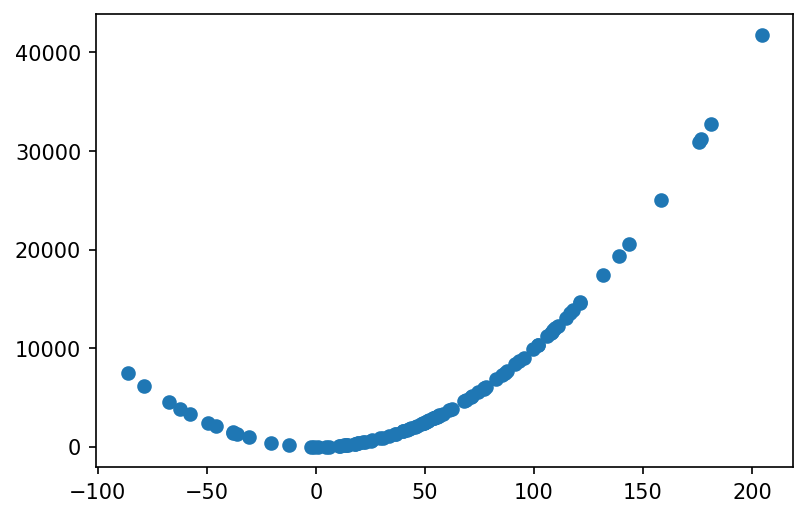

In [20]:
plt.plot(x,y,'o')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y)

In [23]:
X_train = X_train.reshape(-1,1)

In [24]:
X_test = X_test.reshape(-1,1)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred = model.predict(X_test)

In [28]:
plt.style.use("seaborn-whitegrid")

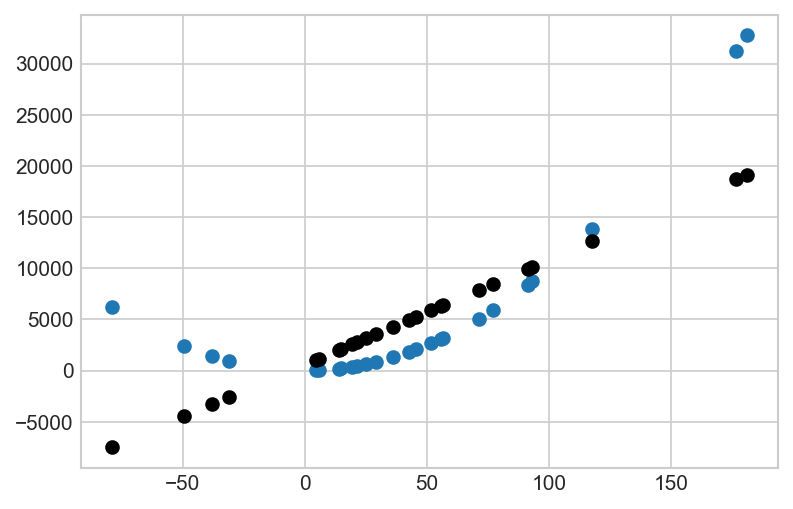

In [29]:
plt.plot(X_test,Y_test,'o',label="ACTUAL")
plt.plot(X_test,pred,'ko',label="Predicted")

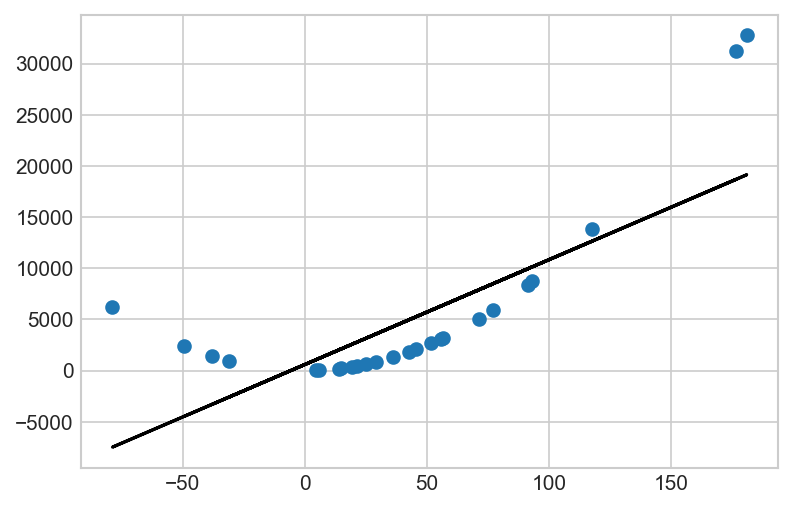

In [30]:
plt.plot(X_test,Y_test,'o',label="ACTUAL")
plt.plot(X_test,pred,'k',label="Predicted")

In [31]:
r2_score(Y_test,pred)

0.6000204704364684

$$ y = ax^2 + bx + c $$

In [32]:
#### preprocessing to convert your data into polynomial data

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing.data:

class PolynomialFeatures(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boolean

In [34]:
poly = PolynomialFeatures()

In [36]:
poly.fit(x.reshape(-1,1))  #training
#fitting to train and find the coeff or some variables which will be used in transform

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [39]:
poly_value = poly.transform(x.reshape(-1,1))

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(poly_value,y)

In [41]:
X_train[:5]

array([[ 1.00000000e+00, -8.63796306e+01,  7.46144058e+03],
       [ 1.00000000e+00,  4.17626929e+01,  1.74412252e+03],
       [ 1.00000000e+00,  5.08385875e+01,  2.58456198e+03],
       [ 1.00000000e+00,  5.18637924e+01,  2.68985297e+03],
       [ 1.00000000e+00,  2.14058857e+01,  4.58211943e+02]])

In [42]:
Y_train[:5]

array([7461.26209933, 1743.79943676, 2586.02415568, 2690.96581517,
        460.7916642 ])

In [43]:
X_test[:5]

array([[ 1.00000000e+00,  5.42967146e+01,  2.94813322e+03],
       [ 1.00000000e+00,  6.86749521e+01,  4.71624904e+03],
       [ 1.00000000e+00,  7.12779054e+01,  5.08053979e+03],
       [ 1.00000000e+00, -6.23426661e+01,  3.88660802e+03],
       [ 1.00000000e+00,  5.63623029e+01,  3.17670918e+03]])

In [44]:
Y_test[:5]

array([2948.58163372, 4716.41481663, 5080.24525848, 3886.63400999,
       3176.60326009])

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model.coef_

array([ 0.        , -0.00282217,  1.00001886])

In [48]:
model.intercept_

0.5407803678072014

In [49]:
p = model.predict(X_test)

In [50]:
r2_score(Y_test,p)

0.9999999839756513

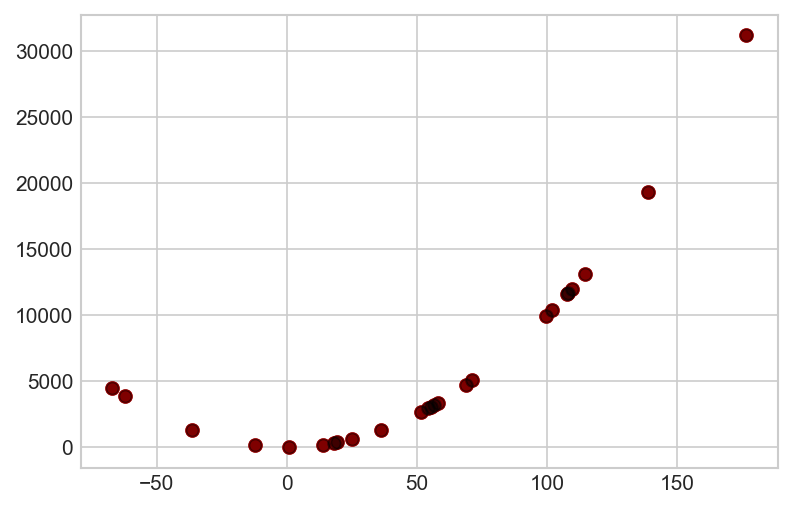

In [59]:
plt.plot(X_test[:,1],Y_test,'ro')
plt.plot(X_test[:,1],p,'ko',alpha=0.5)
plt.show()

In [60]:
mean_absolute_error(Y_test,p)

0.7502023522649417

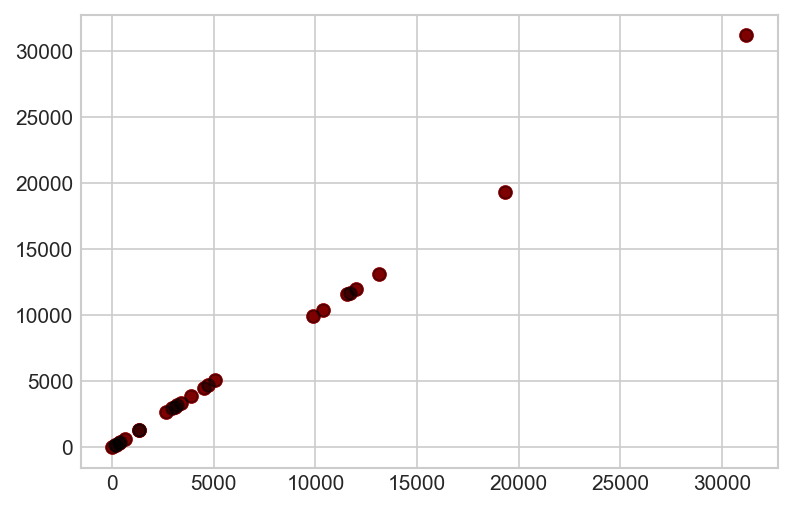

In [61]:
plt.plot(X_test[:,2],Y_test,'ro')
plt.plot(X_test[:,2],p,'ko',alpha=0.5)
plt.show()

In [63]:
train = poly.transform(x.reshape(-1,1))

In [64]:
train[:3]

array([[ 1.00000000e+00, -7.29716397e-01,  5.32486020e-01],
       [ 1.00000000e+00,  3.61876915e+01,  1.30954902e+03],
       [ 1.00000000e+00,  7.12779054e+01,  5.08053979e+03]])

In [65]:
t_pred = model.predict(train)

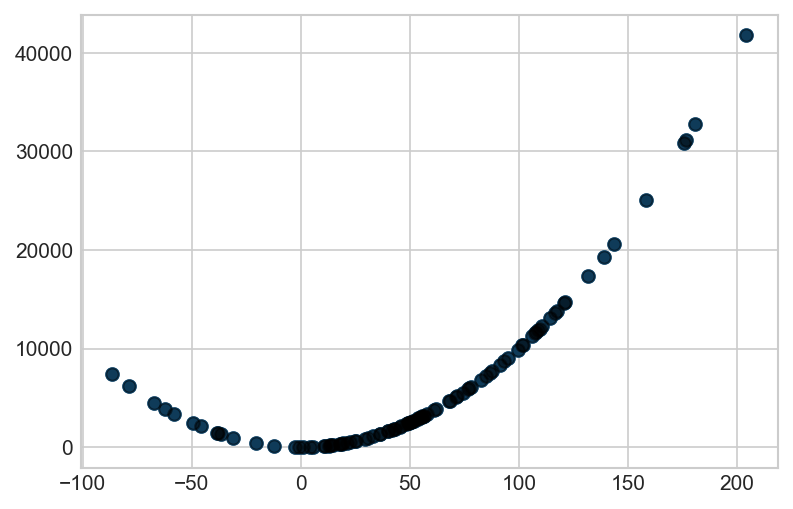

In [67]:
plt.plot(x,y,'o')
plt.plot(x,t_pred,'ko',alpha=0.5)

In [68]:
x[:5]

array([-0.7297164 , 36.18769152, 71.27790538, 76.87078538, 54.97971496])

In [69]:
y[:5]

array([3.78664673e+00, 1.31026458e+03, 5.08024526e+03, 5.90935917e+03,
       3.02221585e+03])

array([3.78664673e+00, 1.31026458e+03, 5.08024526e+03, 5.90935917e+03,
       3.02221585e+03, 1.03586472e+04, 1.73851001e+04, 2.94858163e+03,
       1.22856164e+04, 1.14549295e+02, 1.38465919e+04, 1.59488314e+03,
       1.43354399e+03, 2.17204351e+02, 3.35379564e+03, 2.43505623e+03,
       3.37509483e+03, 2.58602416e+03, 1.15720622e+04, 3.71663315e+03,
       2.31581545e+03, 4.71641482e+03, 9.52054889e+02, 3.07387962e+03,
       4.51139121e+03, 1.20074104e+04, 4.60791664e+02, 2.91166331e+03,
       8.35351459e+03, 3.17660326e+03, 6.08444918e+03, 1.33604925e+03,
       8.70557492e+03, 1.93106760e+04, 3.08951972e+04, 3.88663401e+03,
       2.06369900e+03, 1.27017175e+02, 2.06056605e+04, 2.63917719e+03,
       1.12423340e+04, 2.13512742e+03, 1.45815283e+03, 2.09799270e+03,
       2.69096582e+03, 1.96569521e+02, 1.81633268e+03, 3.11872803e+03,
       9.06147512e+03, 1.46947297e+04, 5.51348526e+03, 2.46652635e+03,
       5.06156841e+02, 2.55711132e+00, 3.11976647e+04, 1.74379944e+03,
      

In [72]:
a = poly.transform([[36.18769152]])

In [73]:
model.predict(a)

array([1310.01237191])

In [75]:
mpg = sns.load_dataset("mpg")

In [76]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


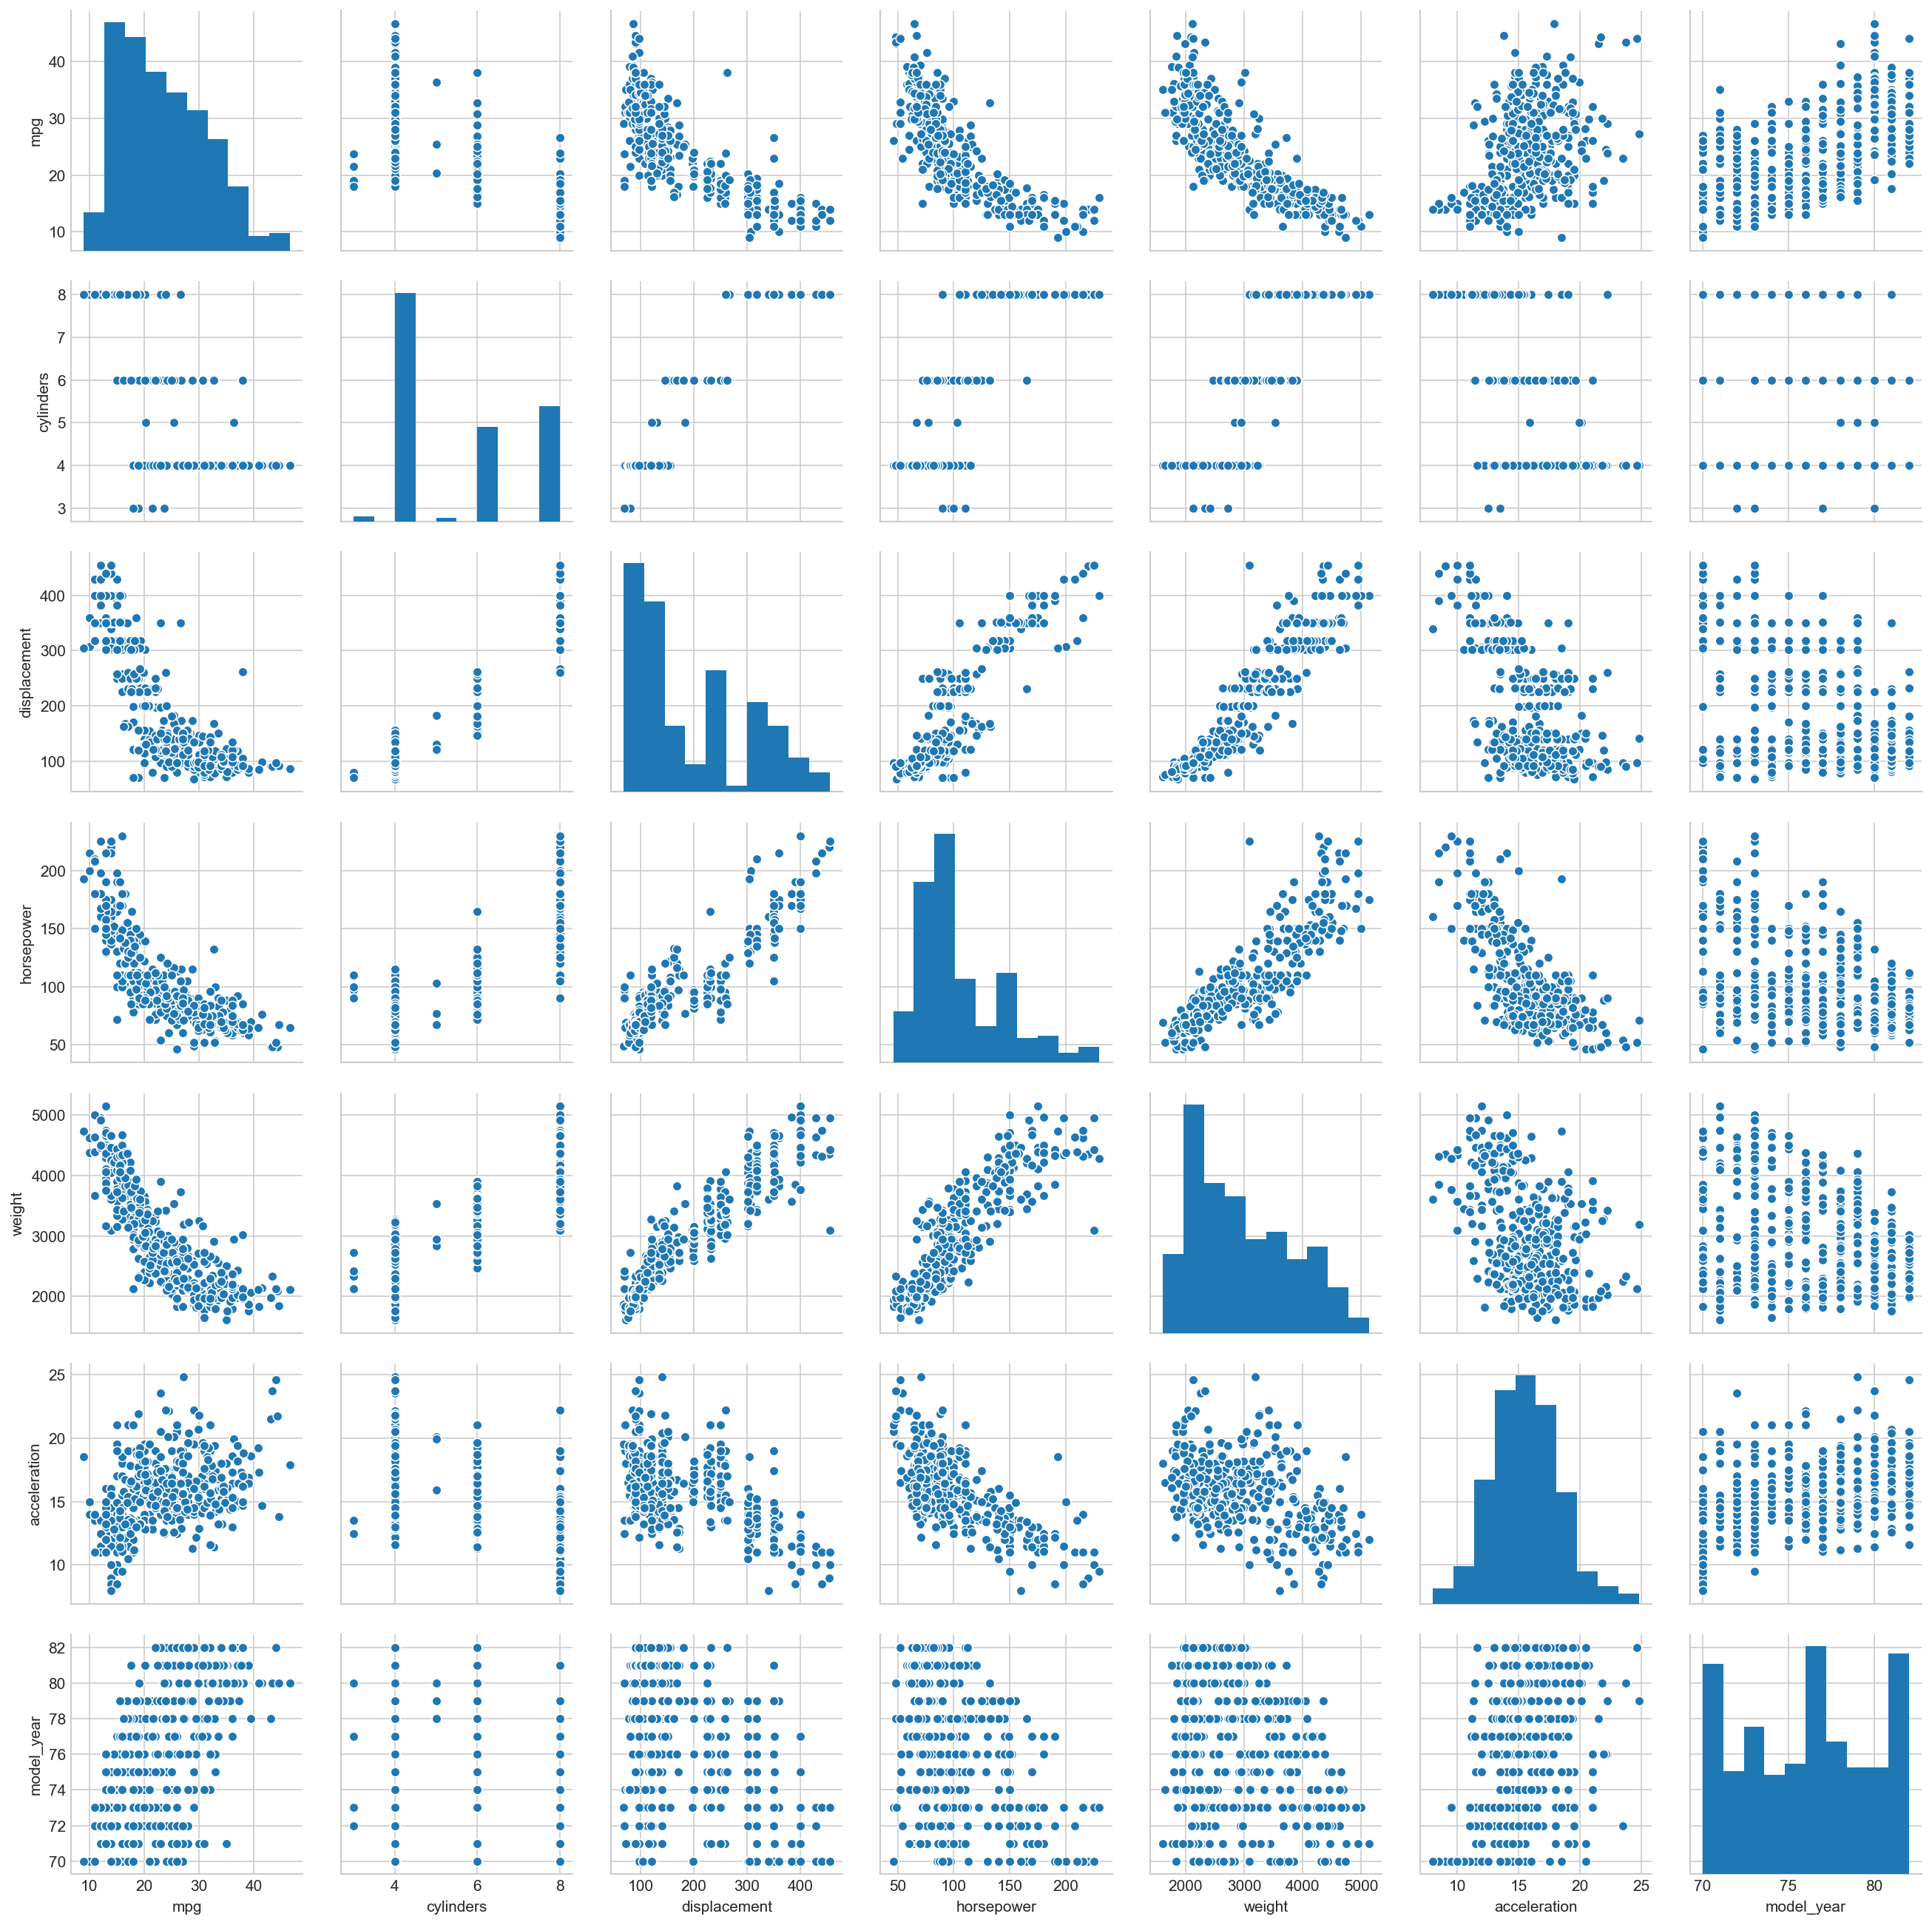

In [77]:
sns.pairplot(mpg)

In [78]:
feature = mpg[['horsepower']]  #2d array
target = mpg['mpg']

In [79]:
feature[:5]

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [80]:
target[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

    Preprocessing
    
        Normalization
            v = x - min/(max-min)
            a = [11,10,19,20]
            x = 11
            min = 10
            max = 20
            v = 11 - 10 / 20 - 10
            
        Standardization
            In this the values are converted suct that the mean of all the values becomes 0 and sd becomes 1
            
            v = x - u / z
            
            u -> mean and z -> standard deviation

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  StandardScaler(copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like 

In [85]:
sc.fit(feature)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
sc.mean_

array([104.46938776])

In [87]:
sc.scale_

array([38.44203271])

In [119]:
sc_values = sc.fit_transform(feature)

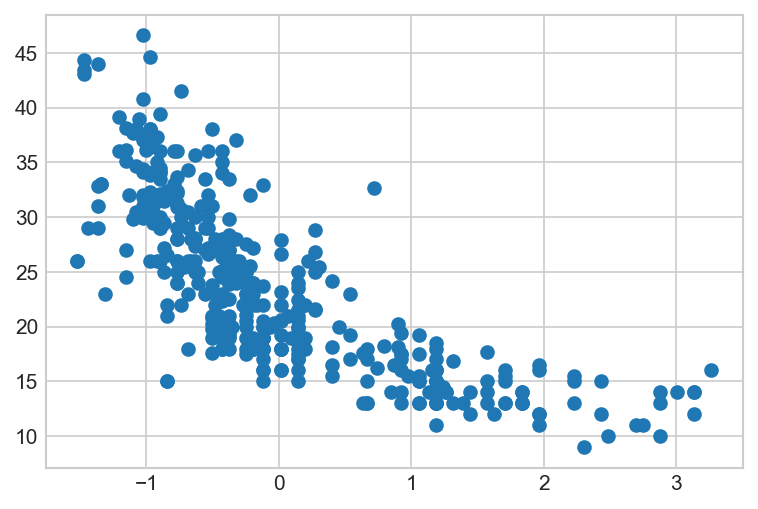

In [94]:
plt.plot(sc_values,target,'o')

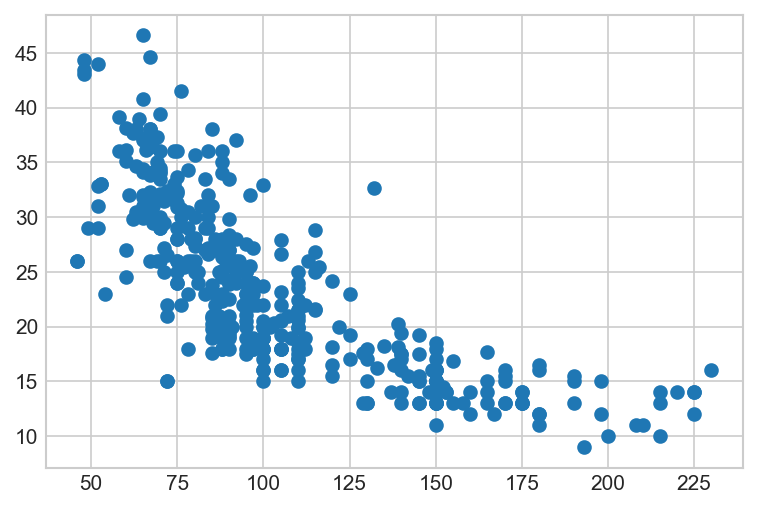

In [95]:
plt.plot(feature,target,'o')

In [120]:
a = []
for i in sc_values:
    a.append(i[0])

In [101]:
np.mean(a)

nan

In [103]:
a

[0.6641327329009119,
 1.574594473048845,
 1.1843965844140165,
 1.1843965844140165,
 0.9242646586574642,
 2.4330298280454676,
 3.0053200647098826,
 2.8752541018316062,
 3.135386027588159,
 2.2249242874402255,
 1.7046604359271211,
 1.4445285101705687,
 1.1843965844140165,
 3.135386027588159,
 -0.24632900724702114,
 -0.24632900724702114,
 -0.19430262209571067,
 -0.5064609330035734,
 -0.42842135527660774,
 -1.5209754434541274,
 -0.45443454785226295,
 -0.37639497012529727,
 -0.24632900724702114,
 0.221908459114773,
 -0.37639497012529727,
 2.8752541018316062,
 2.485056213196778,
 2.7451881389533304,
 2.3029638651671913,
 -0.42842135527660774,
 -0.37639497012529727,
 -0.24632900724702114,
 nan,
 -0.11626304436874499,
 0.013802918509531165,
 -0.11626304436874499,
 -0.42842135527660774,
 -0.11626304436874499,
 1.574594473048845,
 1.8347263988053972,
 1.262436162140982,
 1.1843965844140165,
 1.9647923616836733,
 1.7046604359271211,
 1.8347263988053972,
 0.14386888138780732,
 -0.8446324364870914,

In [102]:
np.std(a)

nan

In [105]:
np.var(a)

nan

In [106]:
poly = PolynomialFeatures()

In [122]:
a = pd.Series(a)
a.fillna(0,inplace=True)

In [123]:
p_values = poly.fit_transform(np.array(a).reshape(-1,1))

In [124]:
X_train,X_test,Y_train,Y_test = train_test_split(p_values,target)

In [125]:
X_train[:5]

array([[ 1.00000000e+00, -9.74698399e-01,  9.50036970e-01],
       [ 1.00000000e+00, -2.46329007e-01,  6.06779798e-02],
       [ 1.00000000e+00,  2.69316175e+00,  7.25312023e+00],
       [ 1.00000000e+00,  1.18439658e+00,  1.40279527e+00],
       [ 1.00000000e+00,  1.38029185e-02,  1.90520559e-04]])

In [126]:
Y_train[:5]

151    31.0
152    19.0
67     11.0
86     14.0
323    27.9
Name: mpg, dtype: float64

In [127]:
model = LinearRegression()

In [128]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
pred = model.predict(X_test)

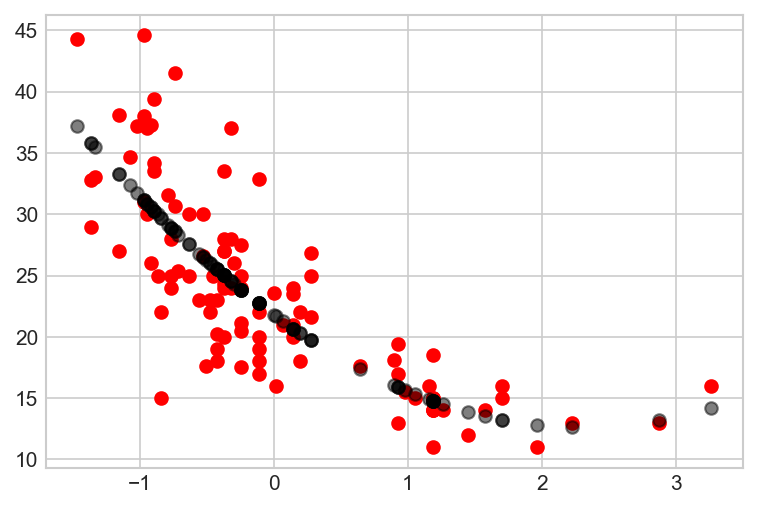

In [131]:
plt.plot(X_test[:,1],Y_test,'ro')
plt.plot(X_test[:,1],pred,'ko',alpha=0.5)
plt.show()

In [132]:
r2_score(Y_test,pred)

0.6413158281435272

In [133]:
mean_absolute_error(Y_test,pred)

3.53172540658849

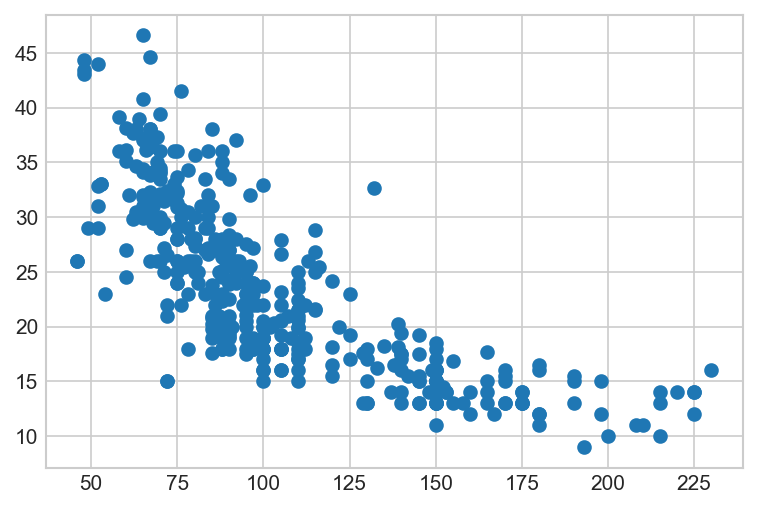

In [135]:
plt.plot(mpg['horsepower'],mpg['mpg'],'o')

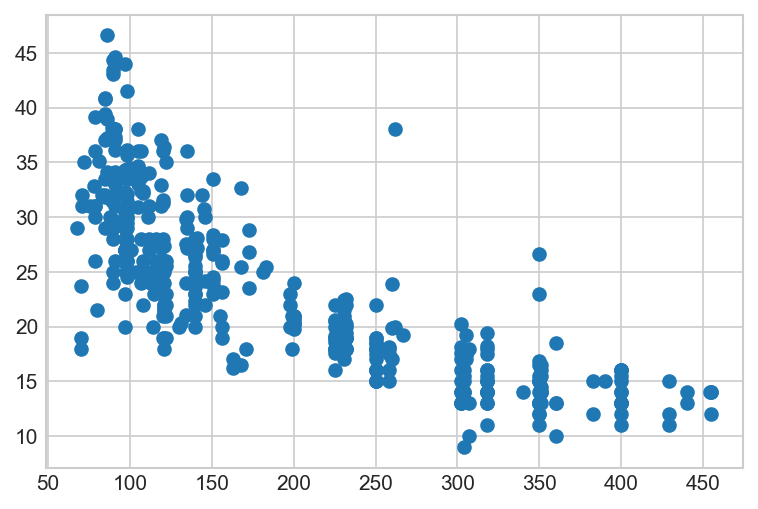

In [136]:
plt.plot(mpg['displacement'],mpg['mpg'],'o')

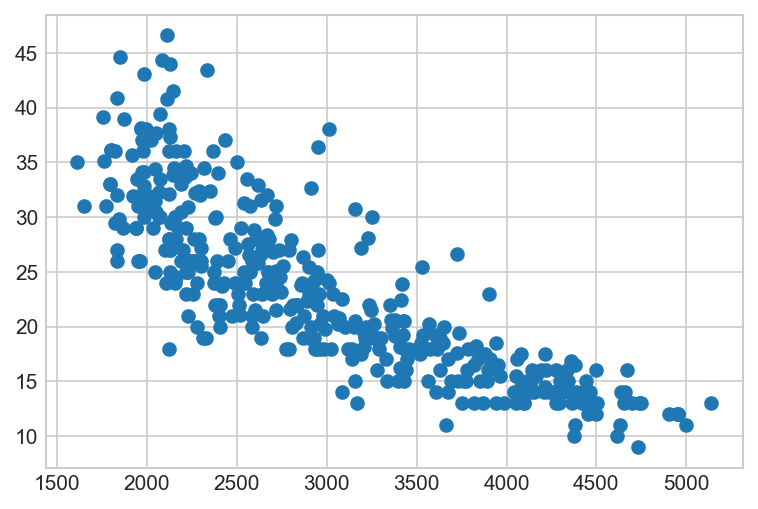

In [137]:
plt.plot(mpg['weight'],mpg['mpg'],'o')

In [138]:
feature = mpg[['displacement','weight','horsepower']]
target = mpg['mpg']

In [139]:
sc_values = sc.fit_transform(feature)

In [140]:
sc_values[:5]

array([[1.0906037 , 0.63086987, 0.66413273],
       [1.5035143 , 0.85433297, 1.57459447],
       [1.19623199, 0.55047045, 1.18439658],
       [1.06179598, 0.54692342, 1.18439658],
       [1.04259084, 0.56584093, 0.92426466]])

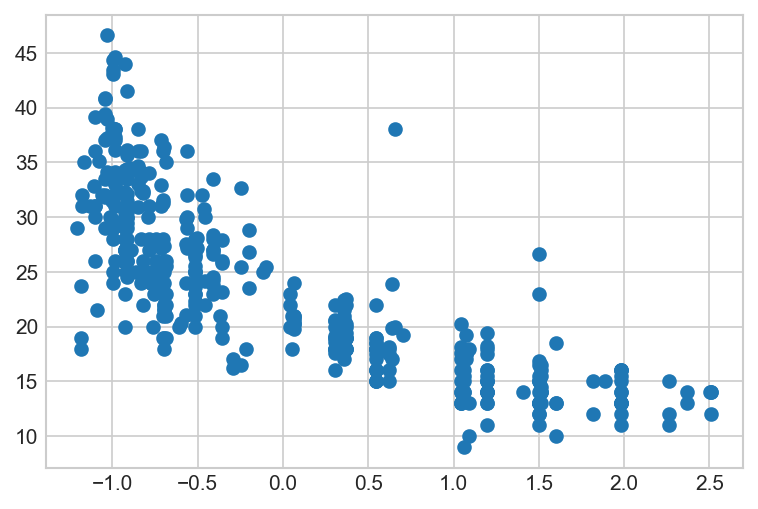

In [142]:
plt.plot(sc_values[:,0],target,'o')
plt.show()

In [143]:
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [146]:
df = pd.DataFrame(sc_values,columns=['displacement','weight','horsepower'])

In [148]:
df.fillna(df.mean(),inplace=True)

In [150]:
p_values = poly.fit_transform(sc_values)

In [151]:
p_values[:3]
#1,a,b,c,a^2,b^2,c^2,ab,bc,ca

array([[1.        , 1.0906037 , 0.63086987, 0.66413273, 1.18941643,
        0.68802902, 0.72430561, 0.3979968 , 0.41898133, 0.44107229],
       [1.        , 1.5035143 , 0.85433297, 1.57459447, 2.26055526,
        1.28450184, 2.36742531, 0.72988483, 1.34522797, 2.47934775],
       [1.        , 1.19623199, 0.55047045, 1.18439658, 1.43097098,
        0.65849037, 1.41681309, 0.30301772, 0.65197532, 1.40279527]])

In [152]:
X_train,X_test,Y_train,Y_test = train_test_split(p_values,target)

In [153]:
model = LinearRegression()

In [154]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
model.coef_

array([ 0.        , -2.06485294, -2.77732928, -3.67237168, -2.90104965,
        4.70601709,  3.55723271, -0.85891889, -2.20421587, -0.02360466])

In [156]:
pred = model.predict(X_test)

In [157]:
pred[:5]

array([16.26573189, 19.66194969, 24.85262001, 33.46323554, 34.89855183])

In [158]:
target[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [159]:
r2_score(Y_test,pred)

0.6604287305930648

In [160]:
sc_values[:5]

array([[1.0906037 , 0.63086987, 0.66413273],
       [1.5035143 , 0.85433297, 1.57459447],
       [1.19623199, 0.55047045, 1.18439658],
       [1.06179598, 0.54692342, 1.18439658],
       [1.04259084, 0.56584093, 0.92426466]])

In [161]:
mean_absolute_error(Y_test,pred)

2.8426751407939257

In [163]:
model.fit(sc_values,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
model.coef_

array([-0.70368769, -4.60700038, -1.43933747])

In [165]:
pred = model.predict(sc_values)

In [166]:
pred[:5]

array([18.88479959, 16.2542832 , 18.43203516, 18.54297731, 18.84375639])

In [167]:
target[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [168]:
mean_absolute_error(target,pred)

3.2502856576191843

In [169]:
r2_score(target,pred)

0.7045328486453861

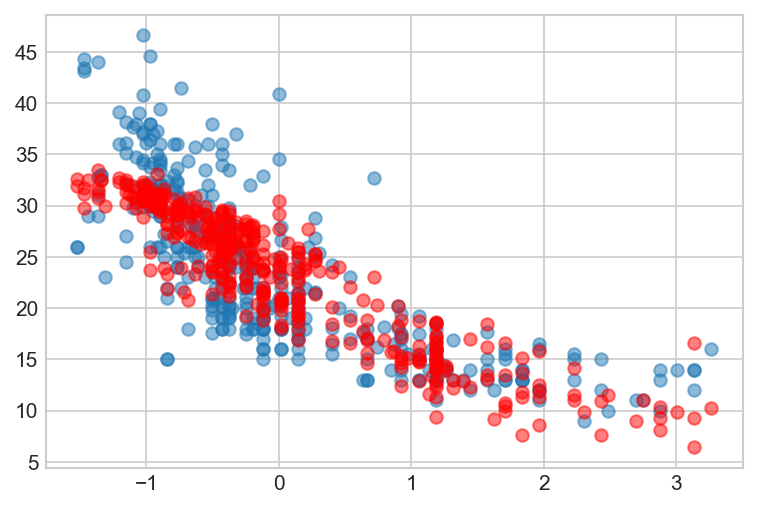

In [173]:
plt.plot(df['horsepower'],target,'o',alpha=0.5)
plt.plot(df['horsepower'],pred,'ro',alpha=0.5)


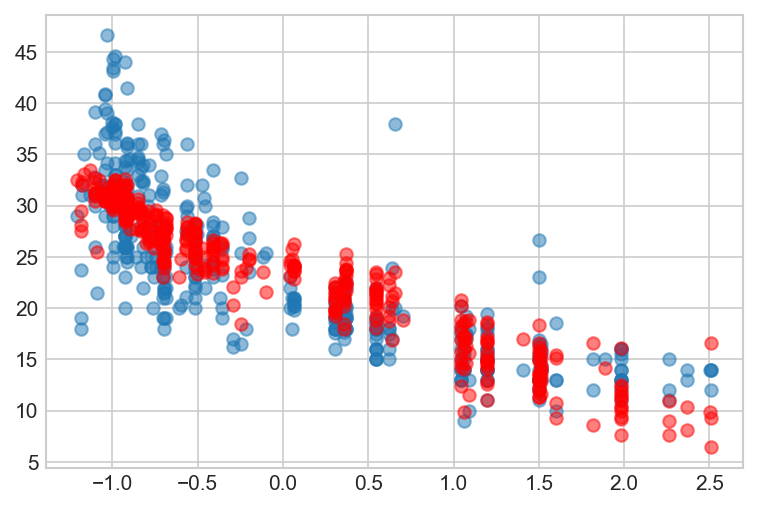

In [174]:
plt.plot(df['displacement'],target,'o',alpha=0.5)
plt.plot(df['displacement'],pred,'ro',alpha=0.5)


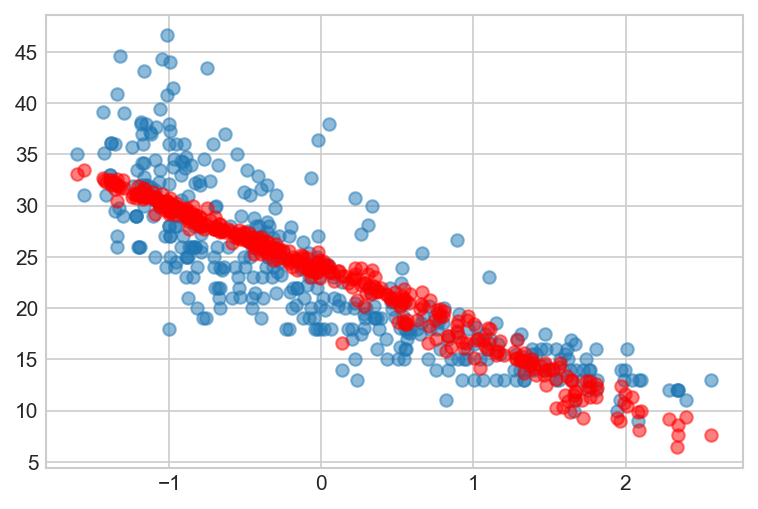

In [175]:
plt.plot(df['weight'],target,'o',alpha=0.5)
plt.plot(df['weight'],pred,'ro',alpha=0.5)


In [176]:
df[:5]

,displacement,weight,horsepower
0,1.090604,0.630870,0.664133
1,1.503514,0.854333,1.574594
2,1.196232,0.550470,1.184397
3,1.061796,0.546923,1.184397
4,1.042591,0.565841,0.924265


In [177]:
mpg[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [178]:
v = [[304,3433,150]]

In [181]:
v = sc.transform(v)

In [182]:
model.predict(v)

array([18.54297731])

In [185]:
feature[:5]

,displacement,weight,horsepower
0,307.0,3504,130.0
1,350.0,3693,165.0
2,318.0,3436,150.0
3,304.0,3433,150.0
4,302.0,3449,140.0


In [188]:
mpg.dropna(inplace=True)

In [189]:
feature = mpg[['displacement','weight','horsepower']]
target = mpg['mpg']

In [190]:
sc_values = sc.fit_transform(feature)

In [191]:
model.fit(sc_values,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
pred = model.predict(sc_values)

In [193]:
r2_score(target,pred)

0.7069554693444708

In [195]:
p_values = poly.fit_transform(feature)

In [196]:
model.fit(p_values,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
p_pred = model.predict(p_values)

In [198]:
p_pred[:5]

array([16.78791598, 15.10316235, 16.09516053, 16.23053796, 16.641494  ])

In [199]:
pred[:5]

array([18.91528915, 16.19718391, 18.38225756, 18.4790758 , 18.8217294 ])

In [200]:
target[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [201]:
r2_score(target,p_pred)

0.7594006796940088

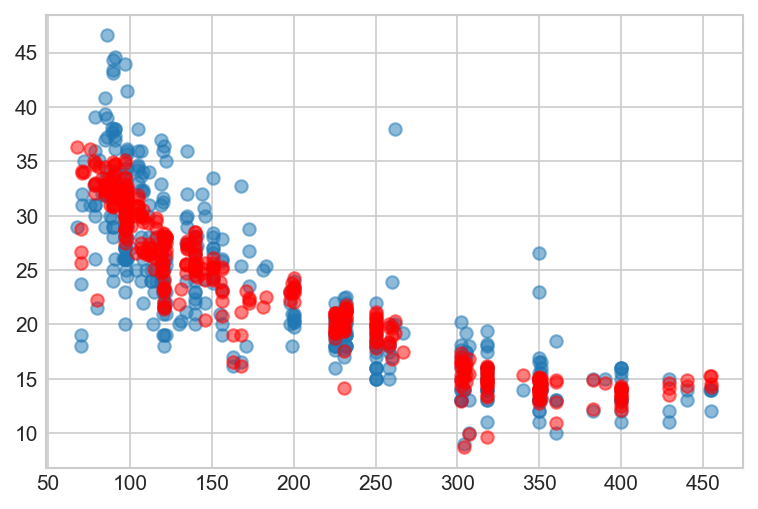

In [204]:
plt.plot(feature['displacement'],target,'o',alpha=0.5)
plt.plot(feature['displacement'],p_pred,'ro',alpha=0.5)
plt.show()

In [205]:
mean_absolute_error(target,p_pred)

2.7812782608124484

In [206]:
### logistic regression